In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [71]:
# Specify the path to your Microsoft CSV file
file_path = r"D:\MRM trials\CarPrices\CarPrice_Assignment.csv"
# Read the CSV file
# Use appropriate encoding and delimiter if necessary
df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=',')  # Adjust 'sep' if needed
# Display the first few rows
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0     1.0        3.0        alfa-romero giulia      gas        std        two   
1     2.0        3.0       alfa-romero stelvio      gas        std        two   
2     3.0        1.0  alfa-romero Quadrifoglio      gas        std        two   
3     4.0        2.0               audi 100 ls      gas        std       four   
4     5.0        2.0                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...       130.0   
1  convertible        rwd          front       88.6  ...       130.0   
2    hatchback        rwd          front       94.5  ...       152.0   
3        sedan        fwd          front       99.8  ...       109.0   
4        sedan        4wd          front       99.4  ...       136.0   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

Mean Squared Error on test set (normalized): 0.20416232712014665
Mean absolute error is 0.33859669347838417
R-squared: 0.2758901282451617
Adjusted R-squared: -13.482197435096767


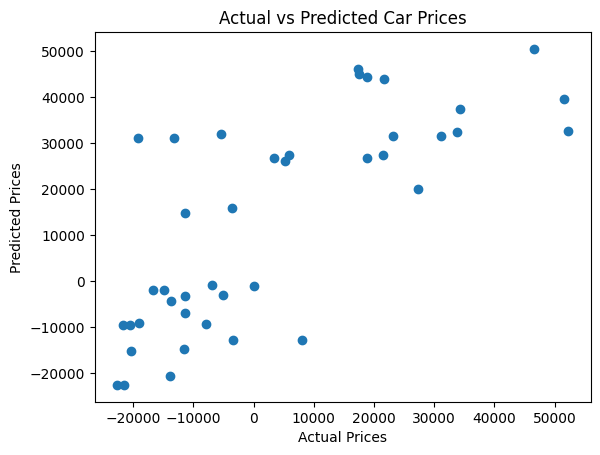

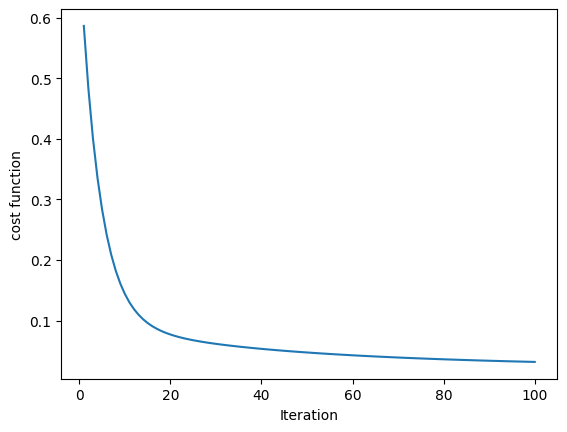

In [72]:
# Step 1: Data Preprocessing
# Dropping rows with missing values
df = df.dropna()
df = df.drop(columns=['car_ID'])

# Convert categorical variables to numeric (One-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Step 2: Correlation Matrix to identify relevant features
correlation_matrix = df.corr()
price_corr = correlation_matrix['price']


# Dropping less relevant features (for illustration)
# You might decide this based on domain knowledge or by inspecting the correlation matrix.
low_corr_columns = price_corr[price_corr.abs() < 0.15].index.tolist()
df = df.drop(columns=low_corr_columns)

# Normalize features (Standardization)
df_features = df.drop('price', axis=1)
df_features = (df_features - df_features.mean()) / df_features.std()

# Normalize the target variable 'price'
y = (df['price'] - df['price'].mean()) / df['price'].std()

# Assign features to X
X = df_features.values
# Step 3: Train-Test Split
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Linear Regression from Scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        self.theta = np.zeros(X.shape[1])
        m = len(y)

        for i in range(self.iterations):
            y_pred = X.dot(self.theta)
            error = y_pred - y
            gradient = (1/m) * X.T.dot(error)
            self.theta -= self.learning_rate * gradient

            # Compute cost (MSE)
            cost = (1 / (2 * m)) * np.sum(error ** 2)
            self.cost_history.append(cost)

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        return X.dot(self.theta)

# Step 5: Train the Model
model = LinearRegressionScratch(learning_rate=0.01, iterations=100)
model.fit(X_train, y_train)

# Step 6: Predict on Test Data
y_pred = model.predict(X_test)

# Step 7: De-normalize Predictions and Actual Prices
min_price = df['price'].min()
max_price = df['price'].max()

y_pred_denorm = y_pred * (max_price - min_price) + min_price
y_test_denorm = y_test * (max_price - min_price) + min_price

# Step 8: Evaluate the Model (Mean Squared Error)
mse = np.mean((y_pred - y_test) ** 2)
print(f'Mean Squared Error on test set (normalized): {mse}')

mae = np.mean((np.abs(y_test - y_pred)))
print("Mean absolute error is", mae)

# Calculate R-squared and Adjusted R-squared
ss_total = np.sum((y_test_denorm - np.mean(y_test_denorm)) ** 2)
ss_res = np.sum((y_test_denorm - y_pred_denorm) ** 2)
r_squared = 1 - (ss_res / ss_total)
adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test_denorm) - 1) / (len(y_test_denorm) - X_test.shape[1] - 1)

print(f'R-squared: {r_squared}')
print(f'Adjusted R-squared: {adjusted_r_squared}')

# Step 9: Visualize Predictions vs Actual Values
plt.scatter(y_test_denorm, y_pred_denorm)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Step 10: Plot the Cost Function vs Iterations
plt.plot(range(1, len(model.cost_history) + 1), model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('cost function')
slope, intercept = np.polyfit(y_test_denorm, y_pred_denorm, 1)

